<a href="https://colab.research.google.com/github/shashwatshukla123/class-119/blob/main/class_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Difference between Regression and Classification 
##Regression Algorithm 
In Regression, the output variable must be of continuous nature or real value. The task of the regression algorithm is to map the input value (x) with the continuous output variable(y). Regression Algorithms are used with continuous data. In Regression, we try to find the best fit line, which can predict the output more accurately. Regression algorithms can be used to solve the regression problems such as Weather Prediction, House price prediction, etc. The regression Algorithm can be further divided into Linear and Non-linear Regression.


##Classification Algorithm
In Classification, the output variable must be a discrete value. The task of the classification algorithm is to map the input value(x) with the discrete output variable(y). Classification Algorithms are used with discrete data. In Classification, we try to find the decision boundary, which can divide the dataset into different classes. Classification Algorithms can be used to solve classification problems such as Identification of spam emails, Speech Recognition, Identification of cancer cells, etc. The Classification algorithms can be divided into Binary Classifier and Multi-class Classifier.

In [2]:
import random
import plotly.express as px
import plotly.figure_factory as ff
import statistics
import csv
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

## Decision Tree Classification Algorithm

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
\
The decisions or the test are performed on the basis of features of the given dataset.
\
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
\
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
\
In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
\
A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
\
Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
\
Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
\
Branch/Sub Tree: A tree formed by splitting the tree.
\
Pruning: Pruning is the process of removing the unwanted branches from the tree.
\
Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
\
Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
\
Step-3: Divide the S into subsets that contains possible values for the best attributes.
\
Step-4: Generate the decision tree node, which contains the best attribute.
\
Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

In [4]:
#Column Name
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv("diabetes.csv", names=col_names).iloc[1:]

print(df.head())

  pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1


In [5]:
features = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[features]
y = df.label

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialising the Decision Tree Model
clf = DecisionTreeClassifier()

#Fitting the data into the model
clf = clf.fit(X_train,y_train)

#Calculating the accuracy of the model
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


# Visualising the Decision Tree

Now that we have have built a decision tree model, that can predict with an accuracy score of 0.67 if a person has diabetes or not based on their data, is there a way we can visualise it?

\
There sure is. Let's see how!

\
## Fun Fact

To create a visualisation for the Decision Tree Classifier we build above, we will use the `export_graphviz` module of python to first convert the data into text that we can read and understand, and then we'll use the `pydotplus` module to convert this text into an image.

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<bmi &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<glucose &le; 114.5<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillcolor

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



Above, we can see how our Decision Tree Classifier got converted into something that we can read and understand. Now, using the `pydotplus`, we will convert this into an image. Let's see how would that look like -

Export_graphviz module of python convert the data into text so that we can read and understand then we can use pydotplus module to convert this text into an image

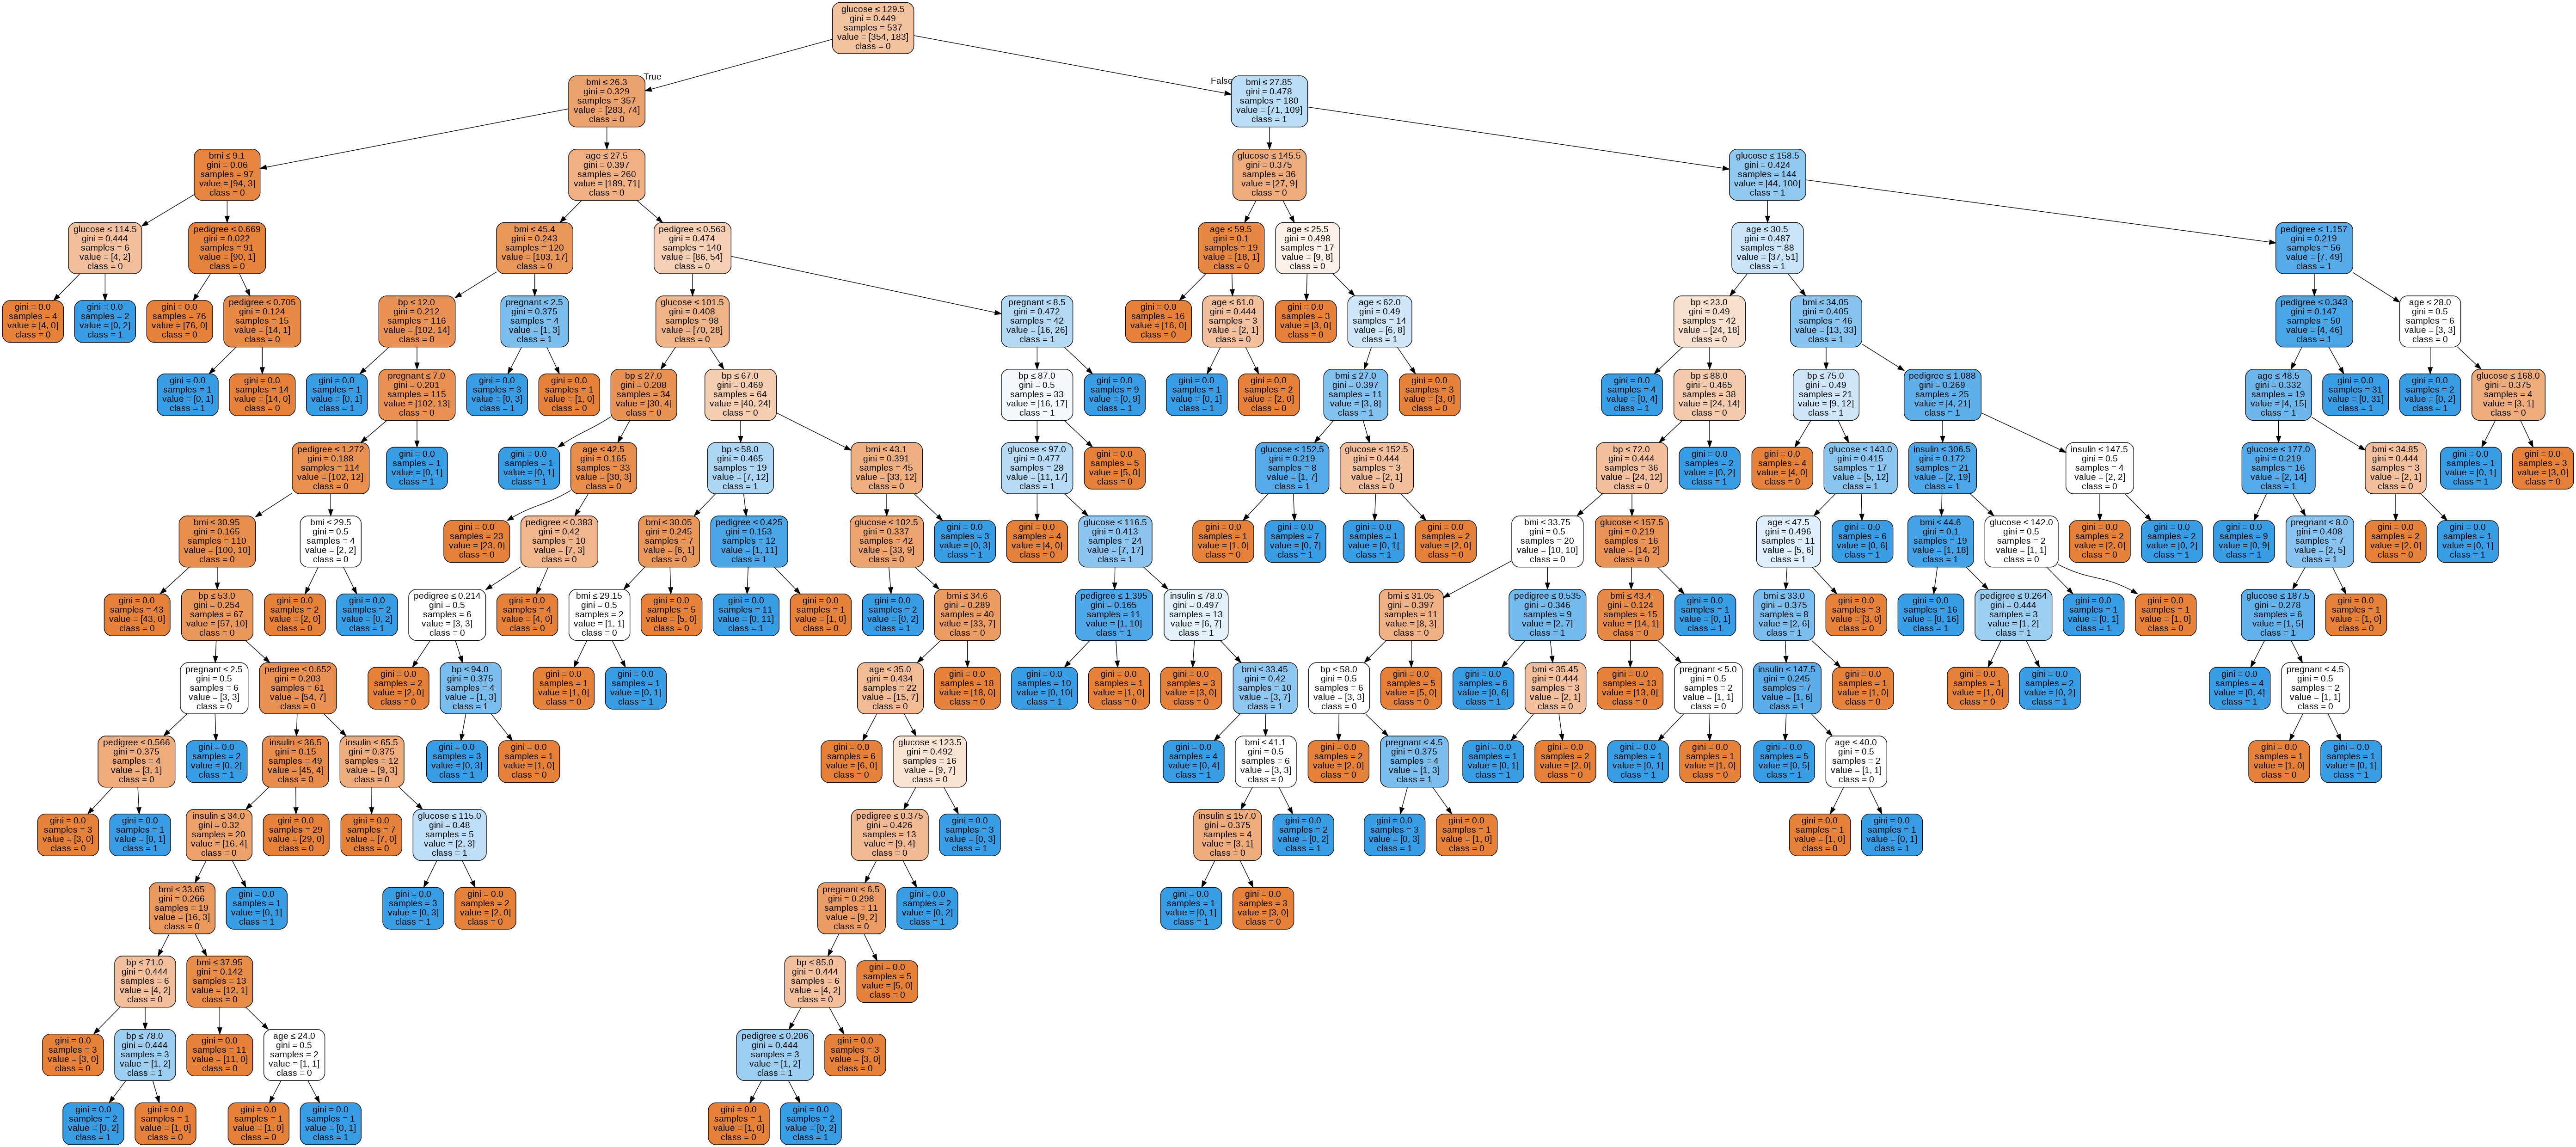

In [8]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In the chart above, we can hardly make out anything, but each of the **internal node** has a decision rule using which, it splits the data.

\
Can we make this decision tree such that we can understand it? Yes we can!

\
We can do that by doing some `pruning`. If we look at the charts above, we can see that our decision tree goes much deeper from our root node. We can limit the max-depth of a Decision Tree Model as per our convenience. Let's work it out again.

In [13]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


Here, we can see that by reducing the maximum depth we want our decision tree to go, we have also achieved a higher accuracy. Let's visualise this again!

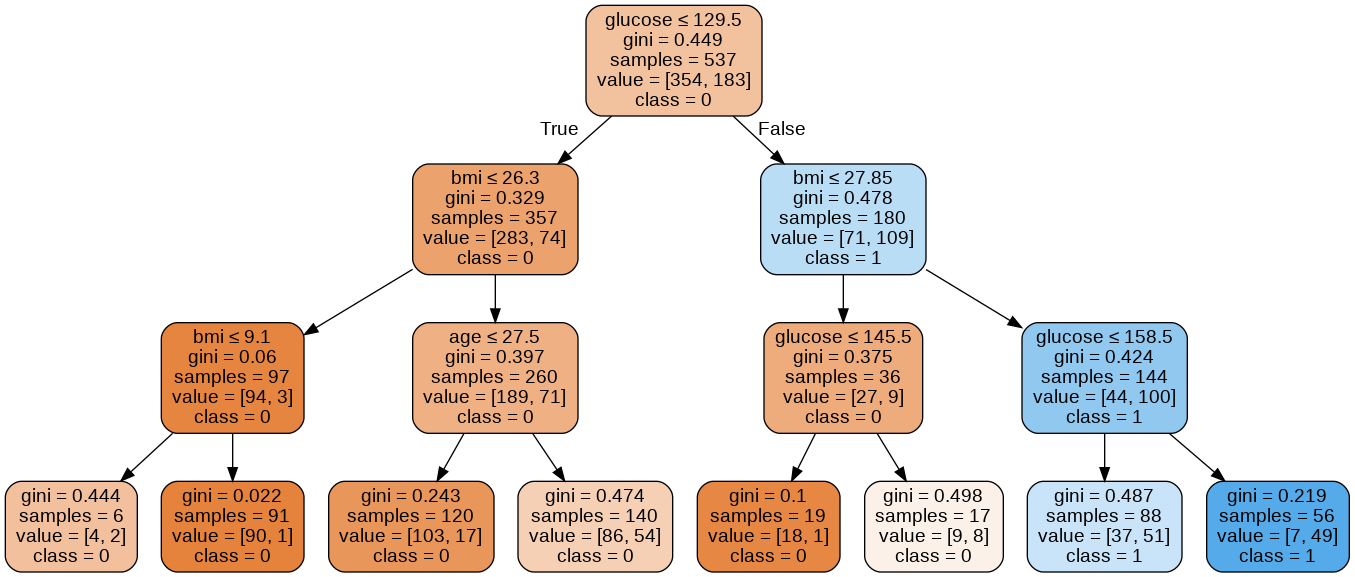

In [14]:
dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Here, we can see that the tree is much more readable and understandable. We set the max-depth to 3, so it only goes 3 layers down from the root node.

\
This pruned model is less complex, explainable, easy to understand and more accurate than the previous decision tree plot.

\
# Conclusion

By looking at this chart, we can say with almost 75% accuracy that a person who's


*   **Glucose** is greater than 129.5 and,
*   **BMI** is greater than 27.85

Is more prone to be a Diabetes Patient.